List of data used:
- OS Open Rivers: https://www.ordnancesurvey.co.uk/products/os-open-rivers
- UK Lakes: https://www.data.gov.uk/dataset/899e3816-b760-4eb4-a1f1-34fc7858f705/spatial-inventory-of-uk-waterbodies 

### First, let's import whitebox and set our environment ready

In [2]:
import os
import whitebox

wbt = whitebox.WhiteboxTools()  # Create WhiteboxTools object
wbt.set_verbose_mode(True)  # Disable detailed logging

data_dir = os.path.join(os.getcwd(), 'data/processed')
wbt.set_working_dir(data_dir)

### Now, let's extract the stream network in our study area by:
1. Filling the depressions in the DTM
2. Getting the flow directions
3. Processing flow accumulations
4. Defining a threshold above which accumulated flow we have our rivers

In [3]:
wbt.fill_depressions(dem='dtm.tif', output='filled_dtm.tif')
wbt.d8_pointer(dem='filled_dtm.tif', output='flow_dir.tif')
wbt.d8_flow_accumulation(
    i='flow_dir.tif',
    output='flow_accum.tif',
    out_type='catchment area',
    pntr=True
)
wbt.extract_streams(
    flow_accum='flow_accum.tif',
    output='streams.tif',
    threshold=50000
)
wbt.raster_streams_to_vector(
    streams='streams.tif',
    d8_pntr='flow_dir.tif',
    output='streamlines.shp',
    esri_pntr=False
)

./whitebox_tools --run="FillDepressions" --wd="/users/wrmod/rafbar/Projs/fdri-spatial-tools/data/processed" --dem='dtm.tif' --output='filled_dtm.tif' --fix_flats -v --compress_rasters=False

******************************
* Welcome to FillDepressions *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Finding pit cells: 6%
Finding pit cells: 12%
Finding pit cells: 18%
Finding pit cells: 25%
Finding pit cells: 31%
Finding pit cells: 37%
Finding pit cells: 43%
Finding pit cells: 50%
Finding pit cells: 56%
Finding pit cells: 62%
Finding pit cells: 68%
Finding pit cells: 75%
Finding pit cells: 81%
Finding pit cells: 87%
Finding pit cells: 93%
Finding pit cells: 100%
Filling depressions: 0%
Filling depressions: 1%
Filling depressions: 2%
Filling depressions: 3%
Filling depressions: 4%
Filling depressions: 5%
Filling depressions: 6%
Filling depressions: 7%
Filling depressions: 8%
Filling depressions: 9%
Filling depressions: 10%
Filli

0

#### Let's now visualize our results
- Download open rivers data sets for comparison
- Load generated rivers
- Load open rivers

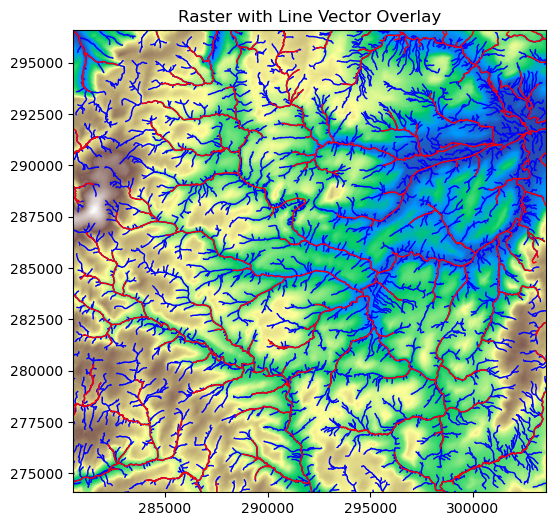

In [ ]:
import rasterio
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open raster
with rasterio.open("data/processed/dtm.tif") as src:
    raster = src.read(1)  # Read the first band
    minx, maxx, miny, maxy = src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top
    extent = [minx, maxx, miny, maxy]

# Open stream networks
gen_rivers = gpd.read_file("data/processed/streamlines.shp")
os_rivers = gpd.read_file("data/raw/open_rivers/WatercourseLink.shp")
os_rivers = os_rivers.clip((minx, miny, maxx, maxy))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
# show(raster, extent=extent, ax=ax, cmap="terrain")  # Adjust cmap as needed
gen_rivers.plot(ax=ax, edgecolor="blue", linewidth=1)  # Overlay line vector
os_rivers.plot(ax=ax, edgecolor="red", linewidth=1) 

plt.title("Raster with Line Vector Overlay")
plt.show()

Hold for visualization comparison in lake where river lines differ considerally

Now, let's correct our DTM by using the OS Open Rivers, so that flow directions will be forced to follow the river flow paths

In [ ]:
wbt.fill_burn(dem='dtm.tif',
              streams=f'{data_dir}/../raw/open_rivers/WatercourseLink.shp',
              output='dtm_burn.tif')

./whitebox_tools --run="FillBurn" --wd="/users/wrmod/rafbar/Projs/fdri-spatial-tools/data/processed" --dem='dtm.tif' --streams='/users/wrmod/rafbar/Projs/fdri-spatial-tools/data/processed/../raw/open_rivers/WatercourseLink.shp' --output='dtm_burn.tif' -v --compress_rasters=False

****************************
* Welcome to FillBurn      *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading streams data...
Reading DEM data...
Rasterizing Streams: 0%
Rasterizing Streams: 1%
Rasterizing Streams: 2%
Rasterizing Streams: 3%
Rasterizing Streams: 4%
Rasterizing Streams: 5%
Rasterizing Streams: 6%
Rasterizing Streams: 7%
Rasterizing Streams: 8%
Rasterizing Streams: 9%
Rasterizing Streams: 10%
Rasterizing Streams: 11%
Rasterizing Streams: 12%
Rasterizing Streams: 13%
Rasterizing Streams: 14%
Rasterizing Streams: 15%
Rasterizing Streams: 16%
Rasterizing Streams: 17%
Rasterizing Streams: 18%
Rasterizing Streams: 19%
Rasterizing Streams: 20%
Rasterizing Str

0

In [12]:
wbt.fill_depressions(dem='dtm_burn.tif', output='filled_dtm.tif')
wbt.d8_pointer(dem='filled_dtm.tif', output='flow_dir.tif')
wbt.d8_flow_accumulation(
    i='flow_dir.tif',
    output='flow_accum.tif',
    out_type='catchment area',
    pntr=True
)
wbt.extract_streams(
    flow_accum='flow_accum.tif',
    output='streams_burn.tif',
    threshold=50000
)
wbt.raster_streams_to_vector(
    streams='streams.tif',
    d8_pntr='flow_dir.tif',
    output='streamlines_burn.shp',
    esri_pntr=False
)

./whitebox_tools --run="FillDepressions" --wd="/users/wrmod/rafbar/Projs/fdri-spatial-tools/data/processed" --dem='dtm_burn.tif' --output='filled_dtm.tif' --fix_flats -v --compress_rasters=False

******************************
* Welcome to FillDepressions *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
Finding pit cells: 6%
Finding pit cells: 12%
Finding pit cells: 18%
Finding pit cells: 25%
Finding pit cells: 31%
Finding pit cells: 37%
Finding pit cells: 43%
Finding pit cells: 50%
Finding pit cells: 56%
Finding pit cells: 62%
Finding pit cells: 68%
Finding pit cells: 75%
Finding pit cells: 81%
Finding pit cells: 87%
Finding pit cells: 93%
Finding pit cells: 100%
Filling depressions: 0%
Filling depressions: 1%
Filling depressions: 2%
Filling depressions: 3%
Filling depressions: 4%
Filling depressions: 5%
Filling depressions: 6%
Filling depressions: 7%
Filling depressions: 8%
Filling depressions: 9%
Filling depressions: 10%


0

It worked fine now (hooray!) Hold a visualization on the lake centerlines

In [14]:
wbt.extract_valleys(
    dem='dtm.tif', 
    output='valleys.tif', 
    variant="LQ", 
    line_thin=True, 
    filter=5
)

./whitebox_tools --run="ExtractValleys" --wd="/users/wrmod/rafbar/Projs/fdri-spatial-tools/data/processed" --dem='dtm.tif' --output='valleys.tif' --variant=LQ --line_thin --filter=5 -v --compress_rasters=False

*****************************
* Welcome to ExtractValleys *
* Powered by WhiteboxTools  *
* www.whiteboxgeo.com       *
*****************************
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progr

0

In [16]:
wbt.remove_short_streams(
    d8_pntr='flow_dir.tif', 
    streams='streams.tif', 
    output='streams_pruned.tif', 
    min_length=250, 
    esri_pntr=False
)
wbt.raster_streams_to_vector(
    streams='streams_pruned.tif',
    d8_pntr='flow_dir.tif',
    output='streamlines.shp',
    esri_pntr=False
)

./whitebox_tools --run="RemoveShortStreams" --wd="/users/wrmod/rafbar/Projs/fdri-spatial-tools/data/processed" --d8_pntr='flow_dir.tif' --streams='streams.tif' --output='streams_pruned.tif' --min_length='250' -v --compress_rasters=False

*********************************
* Welcome to RemoveShortStreams *
* Powered by WhiteboxTools      *
* www.whiteboxgeo.com           *
*********************************
Reading pointer data...
Reading streams data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress

0